# This file validates distance measurement 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## read data files

### a). ground truth

In [3]:
# read ground truth detection labels

gt_path = '/home/brwei01/catkin_ws/src/kitti_publisher/src/results/0000.txt'
df_gt = pd.read_csv(gt_path, header=0, sep=',')
df_gt.head()

,frame,track_id,bbox_left,bbox_top,bbox_right,bbox_bottom,distance_gt
0,0,0,296.744956,161.752147,455.226042,292.372804,12.162262
1,0,1,737.619499,161.531951,931.112229,374.000000,5.367072
2,0,2,1106.137292,166.576807,1204.470628,323.876144,10.269994
3,1,0,294.898777,156.024256,452.199718,284.621269,12.393114
4,1,1,745.017137,156.393157,938.839722,374.000000,5.353091


### b). frame 2d annotated

In [5]:
res_path = '/home/brwei01/Dev/SLAM_OFFLINE/COMP0130_22-23_Topic_03/Coursework_03/Results/0000/console_log_formatted_0000.txt'
col_names = ['frame', 'track_id', 'bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom', 'distance']
df_res = pd.read_csv(res_path, header=None, sep=' ')
df_res.columns = col_names
df_res.head()

,frame,track_id,bbox_left,bbox_top,bbox_right,bbox_bottom,distance
0,15,1,754,157,951,374,11.856934
1,16,1,748,161,944,374,12.484644
2,19,1,731,174,925,374,10.413883
3,21,1,710,176,901,374,10.999434
4,22,1,703,175,892,374,9.446377


### 3). bird view

In [5]:
res_bv_path = '/home/brwei01/Dev/COMP0130_22-23_Topic_03/Coursework_03/Results/console_log_formatted.txt'

### 4). masked 

In [6]:
res_mask_path = '/home/brwei01/Dev/SLAM_MASK/COMP0130_22-23_Topic_03/Coursework_03/Results/console_log_formatted_mask.txt'
col_names = ['frame', 'bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom', 'distance']
df_res_mask = pd.read_csv(res_mask_path, header=None, sep=' ')
df_res_mask.columns = col_names
df_res_mask.head()

,frame,bbox_left,bbox_top,bbox_right,bbox_bottom,distance
0,14,280,158,421,259,4.397029
1,15,280,164,420,259,3.567810
2,16,280,164,420,259,3.567810
3,17,783,169,881,332,12.253211
4,17,284,158,416,256,5.204852


# Plotting

## 1. simply plot one object

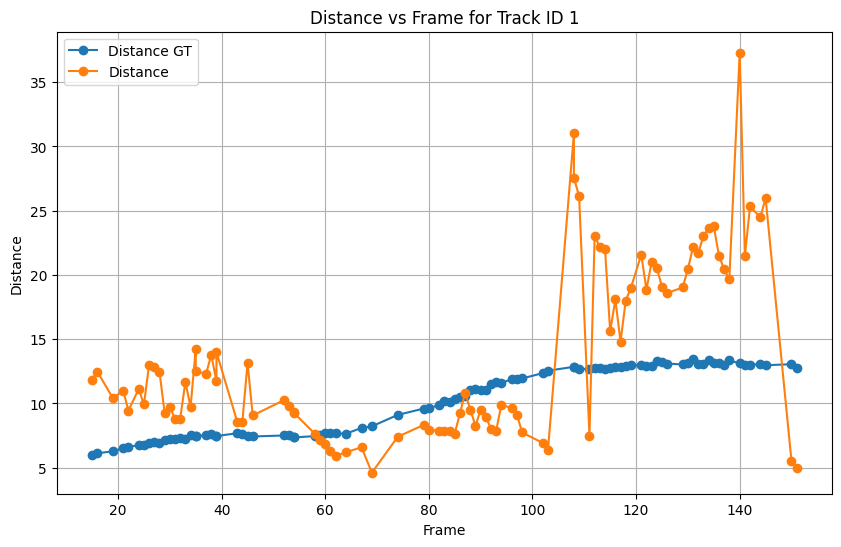

In [6]:
# Select rows with track_id == 1 from both dataframes
df_gt_track = df_gt[df_gt['track_id'] == 1]
df_res_track = df_res[df_res['track_id'] == 1]

# Merge the two dataframes on 'frame' column
merged_df = pd.merge(df_gt_track, df_res_track, on='frame')

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(merged_df['frame'], merged_df['distance_gt'], label='Distance GT', marker='o')
plt.plot(merged_df['frame'], merged_df['distance'], label='Distance', marker='o')
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Distance vs Frame for Track ID 1')
plt.legend()
plt.grid(True)
plt.show()

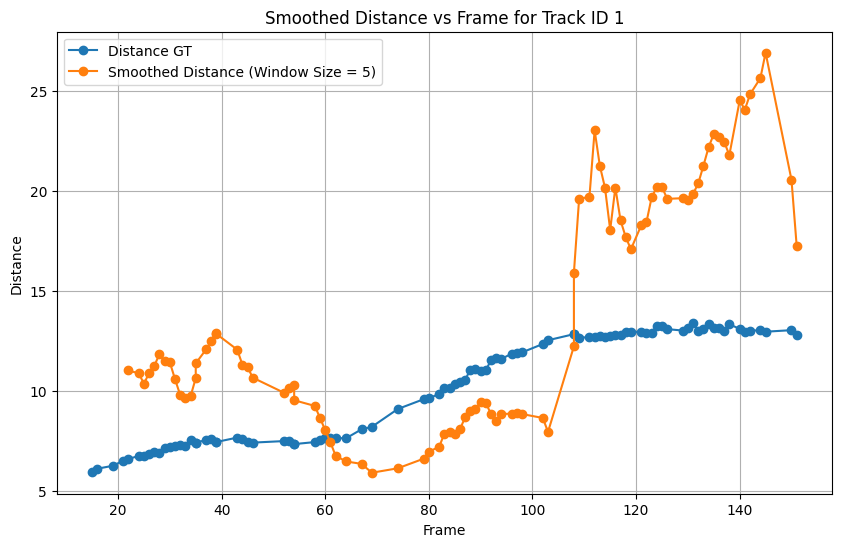

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined df_gt, df_res, and loaded the data.

# Select rows with track_id == 1 from both dataframes
df_gt_track = df_gt[df_gt['track_id'] == 1]
df_res_track = df_res[df_res['track_id'] == 1]

# Merge the two dataframes on 'frame' column
merged_df = pd.merge(df_gt_track, df_res_track, on='frame')

# Calculate a moving average for the 'distance' column
window_size = 5  # You can adjust the window size for smoothing
merged_df['smoothed_distance'] = merged_df['distance'].rolling(window=window_size).mean()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(merged_df['frame'], merged_df['distance_gt'], label='Distance GT', marker='o')
plt.plot(merged_df['frame'], merged_df['smoothed_distance'], label=f'Smoothed Distance (Window Size = {window_size})', marker='o')
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Smoothed Distance vs Frame for Track ID 1')
plt.legend()
plt.grid(True)
plt.show()


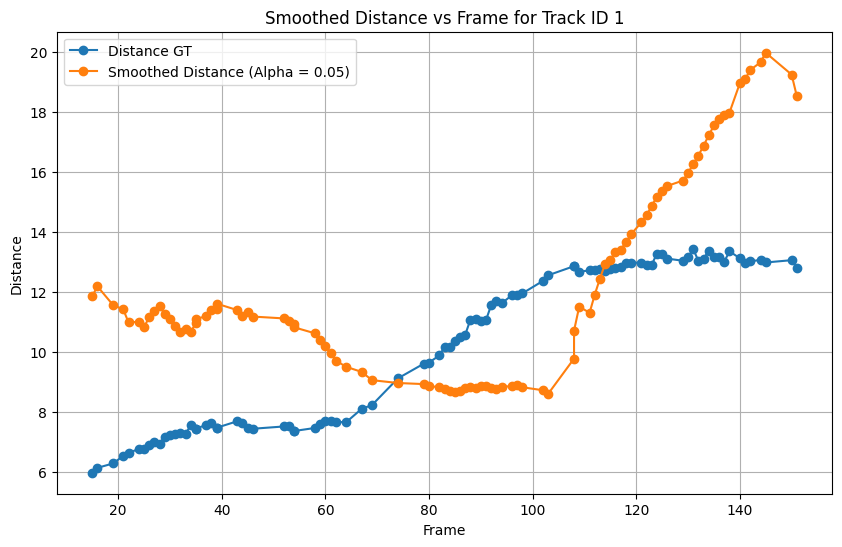

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined df_gt, df_res, and loaded the data.

# Select rows with track_id == 1 from both dataframes
df_gt_track = df_gt[df_gt['track_id'] == 1]
df_res_track = df_res[df_res['track_id'] == 1]

# Merge the two dataframes on 'frame' column
merged_df = pd.merge(df_gt_track, df_res_track, on='frame')

# Calculate the exponential moving average for the 'distance' column
alpha = 0.05  # You can adjust the smoothing factor
merged_df['smoothed_distance'] = merged_df['distance'].ewm(alpha=alpha).mean()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(merged_df['frame'], merged_df['distance_gt'], label='Distance GT', marker='o')
plt.plot(merged_df['frame'], merged_df['smoothed_distance'], label=f'Smoothed Distance (Alpha = {alpha})', marker='o')
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Smoothed Distance vs Frame for Track ID 1')
plt.legend()
plt.grid(True)
plt.show()


## 2. plotting 2 objects for comparison

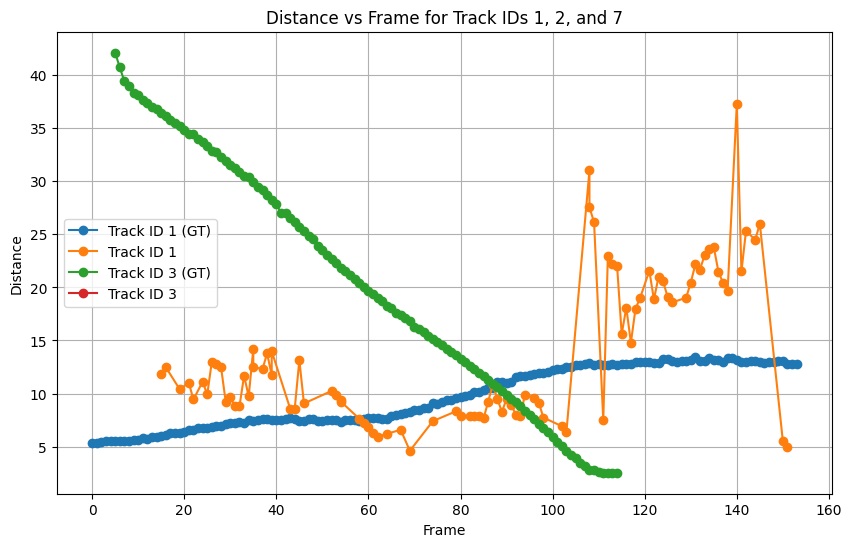

In [15]:
df_gt_track_1 = df_gt[df_gt['track_id'] == 1]
df_res_track_1 = df_res[df_res['track_id'] == 1]

df_gt_track_3 = df_gt[df_gt['track_id'] == 3]
df_res_track_3 = df_res[df_res['track_id'] == 3]

# Merge the selected dataframes on 'frame' column
merged_df = pd.concat([df_gt_track_1, df_gt_track_3, df_res_track_1, df_res_track_3])

# Create a plot
plt.figure(figsize=(10, 6))

# Plot data for track_id 1
plt.plot(df_gt_track_1['frame'], df_gt_track_1['distance_gt'], label='Track ID 1 (GT)', marker='o')
plt.plot(df_res_track_1['frame'], df_res_track_1['distance'], label='Track ID 1', marker='o')

# Plot data for track_id 2
plt.plot(df_gt_track_3['frame'], df_gt_track_3['distance_gt'], label='Track ID 3 (GT)', marker='o')
plt.plot(df_res_track_3['frame'], df_res_track_3['distance'], label='Track ID 3', marker='o')


plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Distance vs Frame for Track IDs 1, 2, and 7')
plt.legend()
plt.grid(True)
plt.show()


## 3. plotting MASK

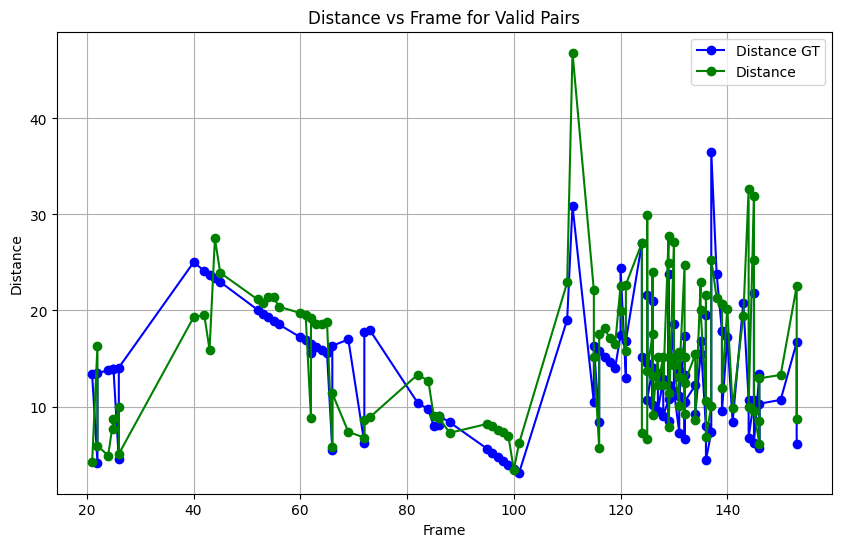

In [9]:
df1 = df_gt
df2 = df_res_mask

# Initialize an empty list to store pairs that satisfy the condition
valid_pairs = []

# Iterate through records in the second dataframe
for index, row in df2.iterrows():
    frame = row['frame']
    bbox_left = row['bbox_left']
    bbox_top = row['bbox_top']
    bbox_right = row['bbox_right']
    bbox_bottom = row['bbox_bottom']
    
    # Check if the bounding box is completely within the corresponding frame in the first dataframe
    condition = ((df1['frame'] == frame) &
                 (df1['bbox_left'] <= bbox_left) &
                 (df1['bbox_top'] <= bbox_top) &
                 (df1['bbox_right'] >= bbox_right) &
                 (df1['bbox_bottom'] >= bbox_bottom))
    
    if condition.any():
        valid_pairs.append((frame, row['distance'], df1[condition]['distance_gt'].values[0]))

# Unpack the valid pairs
frames, distances, distances_gt = zip(*valid_pairs)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(frames, distances_gt, label='Distance GT', marker='o', linestyle='-', color='b')
plt.plot(frames, distances, label='Distance', marker='o', linestyle='-', color='g')
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Distance vs Frame for Valid Pairs')
plt.legend()
plt.grid(True)
plt.show()


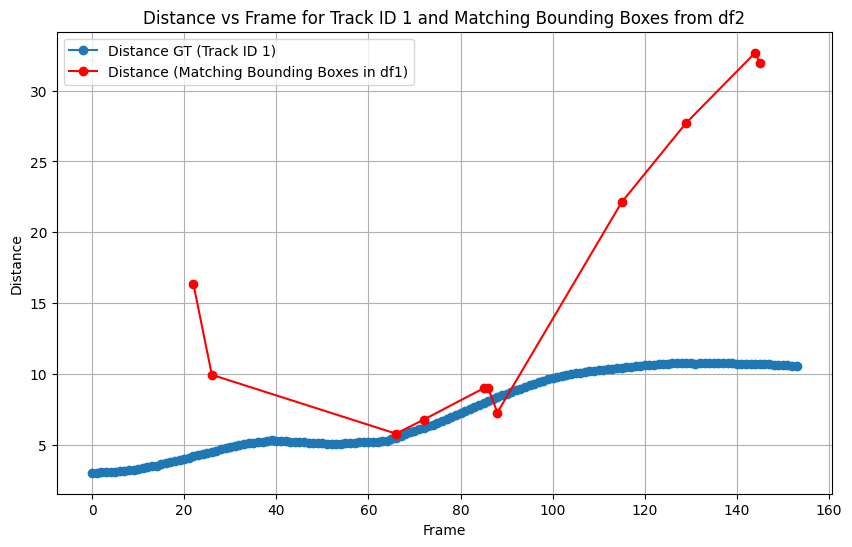

In [10]:
df1 = df_gt
df2 = df_res_mask


# Filter df1 for track_id == 1
df1_track_1 = df1[df1['track_id'] == 1]

# Initialize an empty list to store pairs that satisfy the condition
valid_pairs = []

# Iterate through records in df2
for index, row in df2.iterrows():
    frame = row['frame']
    bbox_left = row['bbox_left']
    bbox_top = row['bbox_top']
    bbox_right = row['bbox_right']
    bbox_bottom = row['bbox_bottom']
    
    # Check if the bounding box is completely within the corresponding frame in df1_track_1
    condition = ((df1_track_1['frame'] == frame) &
                 (df1_track_1['bbox_left'] <= bbox_left) &
                 (df1_track_1['bbox_top'] <= bbox_top) &
                 (df1_track_1['bbox_right'] >= bbox_right) &
                 (df1_track_1['bbox_bottom'] >= bbox_bottom))
    
    if condition.any():
        valid_pairs.append((frame, row['distance']))

# Unpack the valid pairs
frames, distances = zip(*valid_pairs)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot data from df1 with track_id == 1
plt.plot(df1_track_1['frame'], df1_track_1['distance_gt'], label='Distance GT (Track ID 1)', marker='o', linestyle='-')

# Plot data from df2 that satisfies the criteria
plt.plot(frames, distances, label='Distance (Matching Bounding Boxes in df1)', marker='o', color='r', linestyle='-')

plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Distance vs Frame for Track ID 1 and Matching Bounding Boxes from df2')
plt.legend()
plt.grid(True)
plt.show()

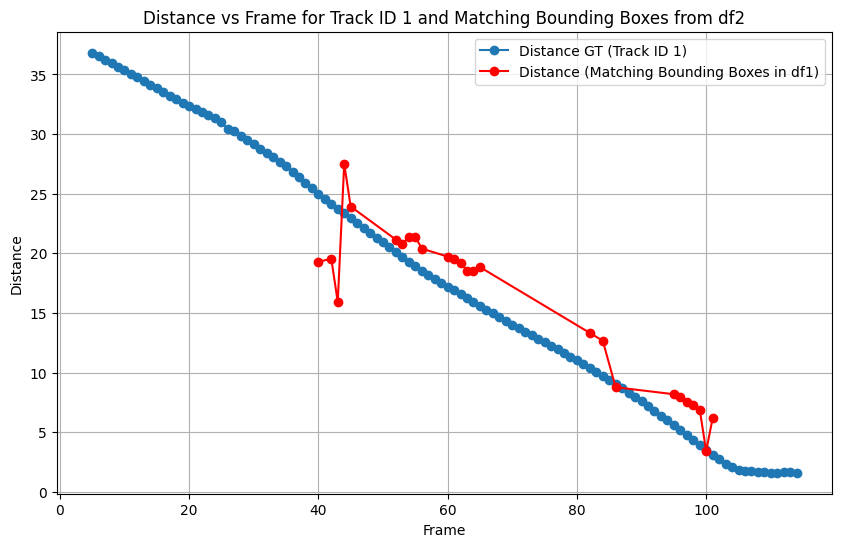

In [11]:
df1 = df_gt
df2 = df_res_mask


# Filter df1 for track_id == 1
df1_track_1 = df1[df1['track_id'] == 3]

# Initialize an empty list to store pairs that satisfy the condition
valid_pairs = []

# Iterate through records in df2
for index, row in df2.iterrows():
    frame = row['frame']
    bbox_left = row['bbox_left']
    bbox_top = row['bbox_top']
    bbox_right = row['bbox_right']
    bbox_bottom = row['bbox_bottom']
    
    # Check if the bounding box is completely within the corresponding frame in df1_track_1
    condition = ((df1_track_1['frame'] == frame) &
                 (df1_track_1['bbox_left'] <= bbox_left) &
                 (df1_track_1['bbox_top'] <= bbox_top) &
                 (df1_track_1['bbox_right'] >= bbox_right) &
                 (df1_track_1['bbox_bottom'] >= bbox_bottom))
    
    if condition.any():
        valid_pairs.append((frame, row['distance']))

# Unpack the valid pairs
frames, distances = zip(*valid_pairs)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot data from df1 with track_id == 1
plt.plot(df1_track_1['frame'], df1_track_1['distance_gt'], label='Distance GT (Track ID 1)', marker='o', linestyle='-')

# Plot data from df2 that satisfies the criteria
plt.plot(frames, distances, label='Distance (Matching Bounding Boxes in df1)', marker='o', color='r', linestyle='-')

plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Distance vs Frame for Track ID 1 and Matching Bounding Boxes from df2')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
df1 = df_gt
df2 = df_res_mask


# Filter df1 for track_id == 1
df1_track_1 = df1[df1['track_id'] == 1]

# Initialize an empty list to store pairs that satisfy the condition
valid_pairs = []

# Iterate through records in df2
for index, row in df2.iterrows():
    frame = df1_track_1['frame']
    bbox_left = df1_track_1['bbox_left']
    bbox_top = df1_track_1['bbox_top']
    bbox_right = df1_track_1['bbox_right']
    bbox_bottom = df1_track_1['bbox_bottom']
    
    # Check if the bounding box is completely within the corresponding frame in df1_track_1
    condition = ((row['frame'] == frame) &
                 (row['bbox_left'] <= bbox_left) &
                 (row['bbox_top'] <= bbox_top) &
                 (row['bbox_right'] >= bbox_right) &
                 (row['bbox_bottom'] >= bbox_bottom))
    
    if condition.any():
        valid_pairs.append((frame, row['distance']))

# Unpack the valid pairs
frames, distances = zip(*valid_pairs)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot data from df1 with track_id == 1
plt.plot(df1_track_1['frame'], df1_track_1['distance_gt'], label='Distance GT (Track ID 1)', marker='o', linestyle='-')

# Plot data from df2 that satisfies the criteria
plt.plot(frames, distances, label='Distance (Matching Bounding Boxes in df1)', marker='o', color='r', linestyle='-')

plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Distance vs Frame for Track ID 1 and Matching Bounding Boxes from df2')
plt.legend()
plt.grid(True)
plt.show()

ValueError: not enough values to unpack (expected 2, got 0)